In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [107]:
orig_18_21 = pd.read_csv('Dataset/CreditHealthGATech_credithealthtrade_orig_2018_2021_rgx.csv', compression = 'gzip')
print(orig_18_21.dtypes)
orig_18_21.head()

origvs3_band                     object
dateOpenedyyyymm                  int64
product2                         object
totaltrade                        int64
balance                           int64
hc                                int64
originationvantagescore3          int64
freq_originationvantagescore3     int64
lookup_nm                        object
dtype: object


,origvs3_band,dateOpenedyyyymm,product2,totaltrade,balance,hc,originationvantagescore3,freq_originationvantagescore3,lookup_nm
0,d. Prime,202104,Personal Loan - Unsecured,256,3288838,3342879,176804,256,lender_81
1,d. Prime,201812,Auto Loan,256,7436471,7499205,176814,256,lender_18
2,d. Prime,201812,Personal Loan - Unsecured,256,2663255,2679969,175998,256,lender_38
3,d. Prime,202104,Other,256,5443109,7518002,177394,256,lender_8
4,d. Prime,201906,Bankcard,256,637741,3189134,176490,256,lender_3


In [108]:
orig_22_23 = pd.read_csv('Dataset/CreditHealthGATech_credithealthtrade_orig_2022_2023_rgx.csv', compression = 'gzip')
print(orig_22_23.dtypes)
orig_22_23 = orig_22_23.rename(columns = {'dateopenedyyyymm':'dateOpenedyyyymm'})
orig_22_23.head()

origvs3_band                     object
dateopenedyyyymm                  int64
product2                         object
totaltrade                        int64
balance                           int64
hc                                int64
originationvantagescore3          int64
freq_originationvantagescore3     int64
lookup_nm                        object
dtype: object


,origvs3_band,dateOpenedyyyymm,product2,totaltrade,balance,hc,originationvantagescore3,freq_originationvantagescore3,lookup_nm
0,f. no score,202201,Bankcard,37,2827,15950,0,0,lender_21
1,f. no score,202201,Personal Loan - Unsecured,3,22748,23000,0,0,lender_16
2,f. no score,202201,Bankcard,52,878,32500,0,0,lender_76
3,f. no score,202201,Personal Loan - Unsecured,4,3300,3300,0,0,lender_21
4,f. no score,202201,Personal Loan - Unsecured,5,3651,3700,0,0,lender_42


In [109]:
orig = pd.concat([orig_18_21,orig_22_23],axis=0).reset_index(drop=True)
orig.head()

,origvs3_band,dateOpenedyyyymm,product2,totaltrade,balance,hc,originationvantagescore3,freq_originationvantagescore3,lookup_nm
0,d. Prime,202104,Personal Loan - Unsecured,256,3288838,3342879,176804,256,lender_81
1,d. Prime,201812,Auto Loan,256,7436471,7499205,176814,256,lender_18
2,d. Prime,201812,Personal Loan - Unsecured,256,2663255,2679969,175998,256,lender_38
3,d. Prime,202104,Other,256,5443109,7518002,177394,256,lender_8
4,d. Prime,201906,Bankcard,256,637741,3189134,176490,256,lender_3


In [110]:
print(orig_18_21.shape)
print(orig_22_23.shape)
print(orig.shape)

(143753, 9)
(62188, 9)
(205941, 9)


## Check for missing data

In [111]:
orig.isna().any()

origvs3_band                     False
dateOpenedyyyymm                 False
product2                         False
totaltrade                       False
balance                          False
hc                               False
originationvantagescore3         False
freq_originationvantagescore3    False
lookup_nm                        False
dtype: bool

## Unique column values

In [112]:
print(orig['origvs3_band'].unique())

['d. Prime' 'b. Subprime' 'f. no score' 'c. Near-prime' 'e. Super-prime'
 'a. Deep subprime']


In [113]:
print(orig['product2'].unique())

['Personal Loan - Unsecured' 'Auto Loan' 'Other' 'Bankcard' 'Student Loan'
 'First Mortgage' 'Home Equity Installment' 'Home Equity Line of Credit'
 'Personal Loan - Revolving' 'Auto Lease']


## Summary Statistics

### Balance summary

In [116]:
print('Mean:',orig['balance'].mean())
print('Median:', orig['balance'].median())
print('Standard Deviation:', orig['balance'].std())
print('Min value:', min(orig['balance']))
print('Max value:', max(orig['balance']))

Mean: 5000055.323170228
Median: 356250.0
Standard Deviation: 29510178.892053496
Min value: 0
Max value: 2055361639


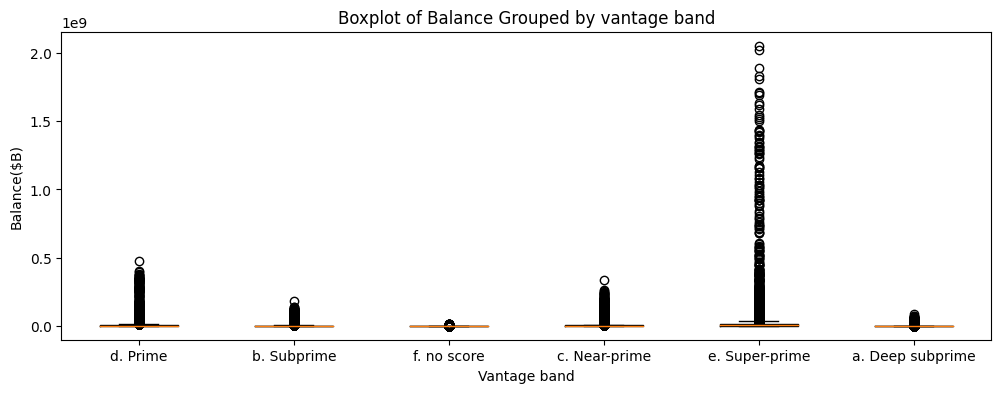

In [124]:
grouped_data = [orig[orig['origvs3_band'] == band]['balance'].values for band in orig['origvs3_band'].unique()]

plt.figure(figsize = (12,4))
plt.boxplot(grouped_data, labels=orig['origvs3_band'].unique())
plt.title('Boxplot of Balance Grouped by vantage band')
plt.ylabel('Balance($B)')
plt.xlabel('Vantage band')
plt.show()

### High Credit Summary

In [125]:
print('Mean:',orig['hc'].mean())
print('Median:', orig['hc'].median())
print('Standard Deviation:', orig['hc'].std())
print('Min value:', min(orig['hc']))
print('Max value:', max(orig['hc']))

Mean: 5716347.689843208
Median: 534687.0
Standard Deviation: 30334913.420926347
Min value: 0
Max value: 2057789893


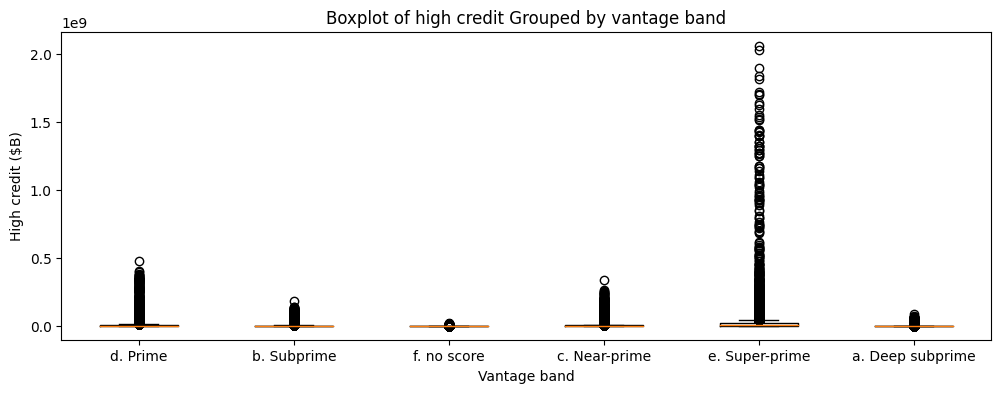

In [128]:
grouped_data = [orig[orig['origvs3_band'] == band]['hc'].values for band in orig['origvs3_band'].unique()]

plt.figure(figsize = (12,4))
plt.boxplot(grouped_data, labels=orig['origvs3_band'].unique())
plt.title('Boxplot of high credit Grouped by vantage band')
plt.ylabel('High credit ($B)')
plt.xlabel('Vantage band')
plt.show()

### Total Trades

In [129]:
print('Mean:',orig['totaltrade'].mean())
print('Median:', orig['totaltrade'].median())
print('Standard Deviation:', orig['totaltrade'].std())
print('Min value:', min(orig['totaltrade']))
print('Max value:', max(orig['totaltrade']))

Mean: 199.7458252606329
Median: 39.0
Standard Deviation: 708.7829326982223
Min value: 1
Max value: 29009


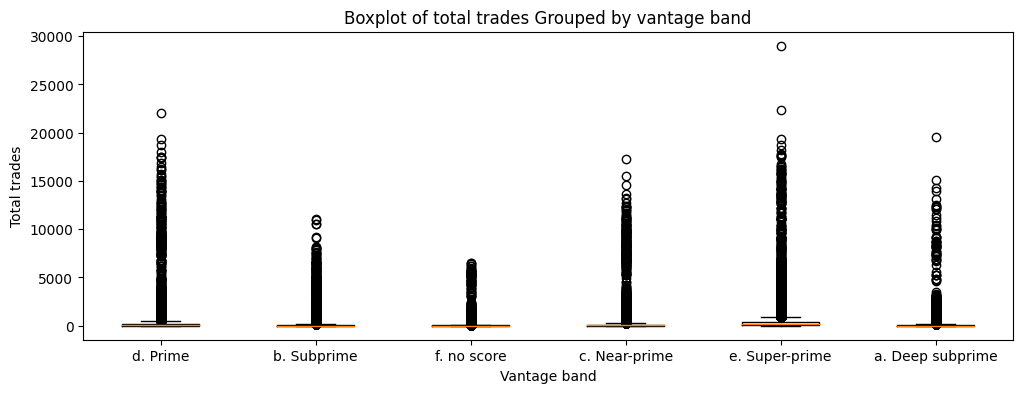

In [130]:
grouped_data = [orig[orig['origvs3_band'] == band]['totaltrade'].values for band in orig['origvs3_band'].unique()]

plt.figure(figsize = (12,4))
plt.boxplot(grouped_data, labels=orig['origvs3_band'].unique())
plt.title('Boxplot of total trades Grouped by vantage band')
plt.ylabel('Total trades')
plt.xlabel('Vantage band')
plt.show()

## Data grouping and aggregation summaries

### Total trades by Product categories

In [133]:
orig.groupby('product2')['totaltrade'].sum().sort_values(ascending = False).reset_index()

,product2,totaltrade
0,Auto Loan,16882533
1,Bankcard,9559498
2,Personal Loan - Unsecured,8181674
3,Other,3264726
4,First Mortgage,1500186
5,Home Equity Line of Credit,1109174
6,Home Equity Installment,394652
7,Auto Lease,118856
8,Student Loan,75451
9,Personal Loan - Revolving,49105


### Total balance by Product categories

In [134]:
orig.groupby('product2')['balance'].sum().sort_values(ascending = False).reset_index()

,product2,balance
0,Auto Loan,452971486299
1,First Mortgage,405293442014
2,Personal Loan - Unsecured,57346019976
3,Other,42000741618
4,Home Equity Line of Credit,33163616921
5,Home Equity Installment,20491608055
6,Bankcard,11731587956
7,Student Loan,4200699966
8,Auto Lease,2496757029
9,Personal Loan - Revolving,20433475


In [135]:
## Data breakdown

orig_18_21[(orig_18_21['origvs3_band']=='d. Prime') & (orig_18_21['product2'] == 'Bankcard') & (orig_18_21['dateOpenedyyyymm'] == 201906)]

,origvs3_band,dateOpenedyyyymm,product2,totaltrade,balance,hc,originationvantagescore3,freq_originationvantagescore3,lookup_nm
4,d. Prime,201906,Bankcard,256,637741,3189134,176490,256,lender_3
1582,d. Prime,201906,Bankcard,4,0,8000,2790,4,lender_34
1662,d. Prime,201906,Bankcard,4,7238,11500,2769,4,lender_61
3540,d. Prime,201906,Bankcard,264,117422,901212,182333,264,lender_96
3697,d. Prime,201906,Bankcard,9,122768,127085,6285,9,lender_85
...,...,...,...,...,...,...,...,...,...
26974,d. Prime,201906,Bankcard,247,615177,1402797,169757,247,lender_36
26983,d. Prime,201906,Bankcard,247,298250,1057796,170620,247,lender_87
27036,d. Prime,201906,Bankcard,1016,1777994,8016803,701453,1016,lender_14
27118,d. Prime,201906,Bankcard,251,491640,1998550,172822,251,lender_52


### Average Vantage Score

In [136]:
## Average Vantage score

orig['avg_originationvantagescore'] = np.where(orig['originationvantagescore3'] != 0,orig['originationvantagescore3']/orig['freq_originationvantagescore3'],0)
orig

,origvs3_band,dateOpenedyyyymm,product2,totaltrade,balance,hc,originationvantagescore3,freq_originationvantagescore3,lookup_nm,avg_originationvantagescore
0,d. Prime,202104,Personal Loan - Unsecured,256,3288838,3342879,176804,256,lender_81,690.640625
1,d. Prime,201812,Auto Loan,256,7436471,7499205,176814,256,lender_18,690.679688
2,d. Prime,201812,Personal Loan - Unsecured,256,2663255,2679969,175998,256,lender_38,687.492188
3,d. Prime,202104,Other,256,5443109,7518002,177394,256,lender_8,692.945312
4,d. Prime,201906,Bankcard,256,637741,3189134,176490,256,lender_3,689.414062
...,...,...,...,...,...,...,...,...,...,...
205936,c. Near-prime,202307,Bankcard,737,244749,4433526,138629,216,lender_94,641.800926
205937,c. Near-prime,202307,Bankcard,754,566879,3543050,141808,221,lender_97,641.665158
205938,c. Near-prime,202307,Bankcard,754,329826,1580232,141358,221,lender_88,639.628959
205939,e. Super-prime,202307,Bankcard,4256,1012088,21377357,988260,1248,lender_43,791.875000


In [137]:
orig['lookup_nm'].unique()

array(['lender_81', 'lender_18', 'lender_38', 'lender_8', 'lender_3',
       'lender_68', 'lender_43', 'lender_84', 'lender_19', 'lender_45',
       'lender_92', 'lender_96', 'lender_17', 'lender_40', 'lender_64',
       'lender_100', 'lender_47', 'lender_71', 'lender_54', 'lender_7',
       'lender_36', 'lender_87', 'lender_63', 'lender_77', 'lender_94',
       'lender_39', 'lender_86', 'lender_85', 'lender_82', 'lender_66',
       'lender_42', 'lender_83', 'lender_75', 'lender_67', 'lender_55',
       'lender_89', 'lender_29', 'lender_65', 'lender_34', 'lender_24',
       'lender_28', 'lender_70', 'lender_80', 'lender_6', 'lender_90',
       'lender_74', 'lender_61', 'lender_79', 'lender_25', 'lender_9',
       'lender_93', 'lender_62', 'lender_49', 'lender_72', 'lender_33',
       'lender_59', 'lender_26', 'lender_60', 'lender_32', 'lender_4',
       'lender_31', 'lender_56', 'lender_78', 'lender_23', 'lender_27',
       'lender_15', 'lender_13', 'lender_37', 'lender_12', 'lender_52

### Average Origination vantage score by lender

In [138]:
lender_vscore = orig.groupby('lookup_nm').apply(lambda orig: orig['originationvantagescore3'].sum()/orig['freq_originationvantagescore3'].sum()).reset_index()
lender_vscore.columns = ['lookup_nm','avg_vscore']
lender_vscore = lender_vscore.sort_values(by = 'avg_vscore',ascending=True)

In [139]:
lender_vscore

,lookup_nm,avg_vscore
77,lender_79,646.665522
88,lender_89,649.802293
89,lender_9,668.499220
63,lender_66,670.836934
72,lender_74,673.961789
...,...,...
21,lender_28,741.524988
3,lender_11,742.084090
27,lender_33,742.384942
73,lender_75,747.274597


In [141]:
products = orig.loc[orig['lookup_nm'] == 'lender_46','product2'].unique()
products

array(['Other', 'Home Equity Installment', 'Auto Lease', 'Bankcard',
       'Personal Loan - Unsecured', 'First Mortgage',
       'Home Equity Line of Credit', 'Auto Loan'], dtype=object)

## Field deep dive

### Zero Balance rows

In [142]:
orig[orig['balance'] == 0]

,origvs3_band,dateOpenedyyyymm,product2,totaltrade,balance,hc,originationvantagescore3,freq_originationvantagescore3,lookup_nm,avg_originationvantagescore
57,d. Prime,202005,Bankcard,1,0,5000,701,1,lender_34,701.000000
58,d. Prime,201809,Student Loan,1,0,0,715,1,lender_63,715.000000
68,d. Prime,201812,Other,1,0,500,716,1,lender_38,716.000000
69,d. Prime,202011,Bankcard,1,0,300,683,1,lender_80,683.000000
76,d. Prime,202102,Home Equity Line of Credit,1,0,60000,668,1,lender_42,668.000000
...,...,...,...,...,...,...,...,...,...,...
205793,e. Super-prime,202307,Bankcard,75,0,703237,17154,22,lender_23,779.727273
205807,b. Subprime,202307,Bankcard,95,0,97478,16786,28,lender_100,599.500000
205831,d. Prime,202307,Bankcard,123,0,855025,24749,36,lender_22,687.472222
205893,c. Near-prime,202307,Bankcard,304,0,1067736,57129,89,lender_100,641.898876


### Balance Time series

Text(0, 0.5, 'Balance ($M)')

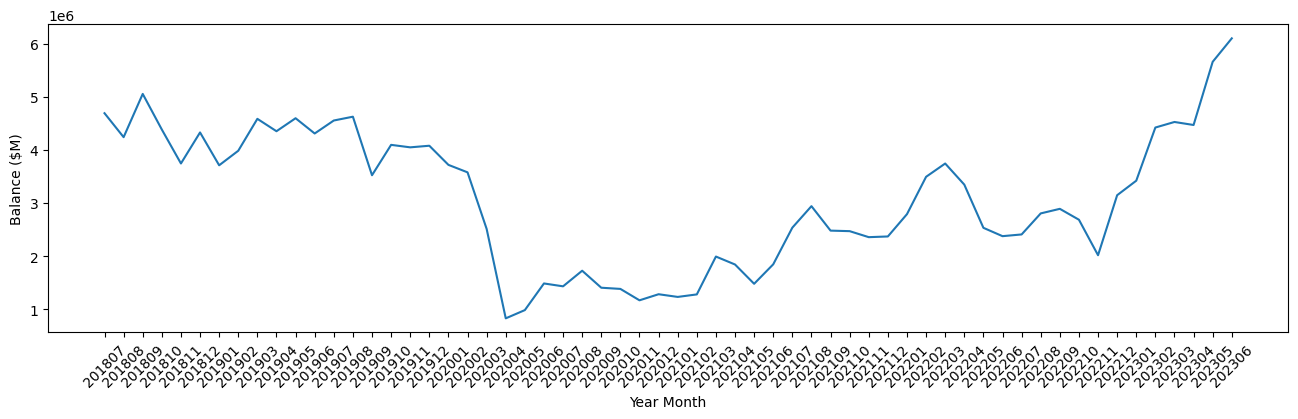

In [148]:
lender = 'lender_46'
band = 'd. Prime'
product = 'Auto Loan'

data = orig[(orig['lookup_nm'] == lender) & (orig['origvs3_band'] == band) & (orig['product2'] == product)]
data = data.sort_values(by = 'dateOpenedyyyymm',ascending=True)
data['dateOpenedyyyymm'] = data['dateOpenedyyyymm'].astype(str)

plt.figure(figsize = (16,4))
plt.xticks(rotation = 45)
plt.plot(data['dateOpenedyyyymm'],data['balance'])
plt.xlabel('Year Month')
plt.ylabel('Balance ($M)')

In [149]:
vs3_band_balance = orig.groupby('origvs3_band').apply(lambda orig: orig['balance'].sum()).reset_index()
vs3_band_balance.columns = ['origvs3_band','total balance']
vs3_band_balance

,origvs3_band,total balance
0,a. Deep subprime,16876381704
1,b. Subprime,37441752893
2,c. Near-prime,100998879894
3,d. Prime,222668264309
4,e. Super-prime,646109997048
5,f. no score,5621117461


Text(0, 0.5, 'Balance ($100B)')

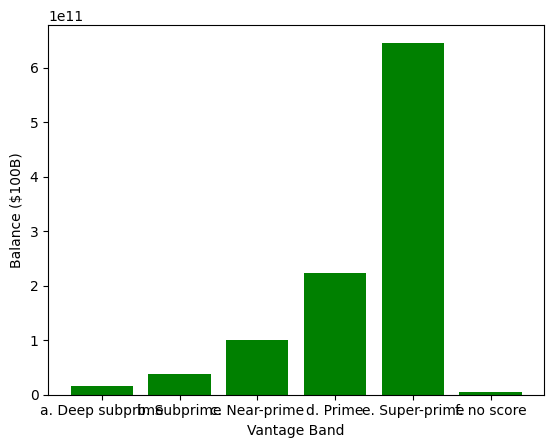

In [150]:
plt.bar(vs3_band_balance['origvs3_band'], vs3_band_balance['total balance'],align = 'center',color = 'green')
plt.xlabel('Vantage Band')
plt.ylabel('Balance ($100B)')

### Trade Count

In [151]:
vs3_band_trade_count = orig.groupby('origvs3_band').apply(lambda orig: orig['totaltrade'].sum()).reset_index()
vs3_band_trade_count.columns = ['origvs3_band','totaltrade_count']
vs3_band_trade_count

,origvs3_band,totaltrade_count
0,a. Deep subprime,2911761
1,b. Subprime,3179092
2,c. Near-prime,6122933
3,d. Prime,10005026
4,e. Super-prime,17269582
5,f. no score,1647461


<BarContainer object of 6 artists>

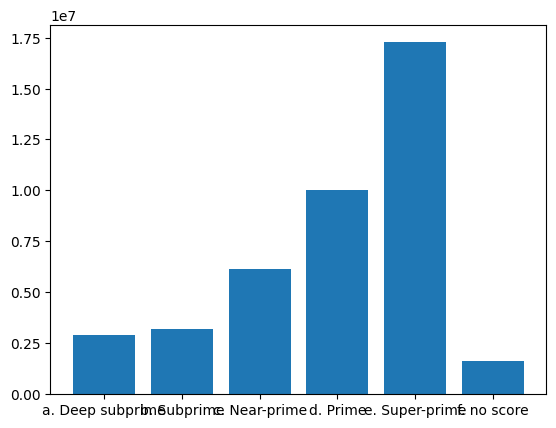

In [152]:
plt.bar(vs3_band_trade_count['origvs3_band'],vs3_band_trade_count['totaltrade_count'])

## Year on Year Stats

In [153]:
orig['dateOpenedyyyymm'] = orig['dateOpenedyyyymm'].astype(str)
orig['year'] = orig['dateOpenedyyyymm'].apply(lambda x:x[:4]).astype(int)
orig['dateOpenedyyyymm'] = orig['dateOpenedyyyymm'].astype(int)

In [154]:
orig.head()

,origvs3_band,dateOpenedyyyymm,product2,totaltrade,balance,hc,originationvantagescore3,freq_originationvantagescore3,lookup_nm,avg_originationvantagescore,year
0,d. Prime,202104,Personal Loan - Unsecured,256,3288838,3342879,176804,256,lender_81,690.640625,2021
1,d. Prime,201812,Auto Loan,256,7436471,7499205,176814,256,lender_18,690.679688,2018
2,d. Prime,201812,Personal Loan - Unsecured,256,2663255,2679969,175998,256,lender_38,687.492188,2018
3,d. Prime,202104,Other,256,5443109,7518002,177394,256,lender_8,692.945312,2021
4,d. Prime,201906,Bankcard,256,637741,3189134,176490,256,lender_3,689.414062,2019


### Balance

In [162]:
yearly_balance = orig.loc[orig['year']!=2023,['year','balance']].groupby('year').sum('balance').reset_index()
yearly_balance['YoY change'] = yearly_balance['balance'].pct_change()*100
yearly_balance['YoY change'] = yearly_balance['YoY change'].round(2).fillna("NA") 
yearly_balance['balance'] = yearly_balance['balance'].apply(lambda x:x/1000000000)
yearly_balance['year'] = yearly_balance['year'].astype(str)
yearly_balance

,year,balance,YoY change
0,2018,73.397782,NA
1,2019,165.595714,125.61
2,2020,211.436654,27.68
3,2021,244.018808,15.41
4,2022,234.048451,-4.09


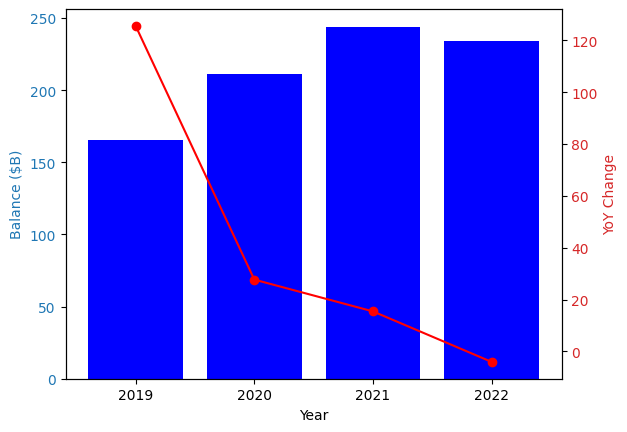

In [163]:
subset = yearly_balance.loc[1:, ['year', 'balance', 'YoY change']]

fig, ax1 = plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('Balance ($B)', color='tab:blue')
ax1.bar(subset['year'], subset['balance'], color='blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis plot
ax2 = ax1.twinx()
ax2.set_ylabel('YoY Change', color='tab:red')
ax2.plot(subset['year'], subset['YoY change'], color='red', marker='o')
ax2.tick_params(axis='y', labelcolor='tab:red')

### Balance for subprime and deep subprime accounts

In [172]:
yearly_balance_sp = orig.loc[(orig['origvs3_band'].isin(['a. Deep subprime','b. Subprime'])) & (orig['year']!=2023),['year','balance']].groupby('year').sum('balance').reset_index()
yearly_balance_sp['YoY change'] = yearly_balance_sp['balance'].pct_change()*100
yearly_balance_sp['YoY change'] = yearly_balance_sp['YoY change'].round(2).fillna("NA") 
yearly_balance_sp['balance'] = yearly_balance_sp['balance'].apply(lambda x:x/1000000000)
yearly_balance_sp['year'] = yearly_balance_sp['year'].astype(str)
yearly_balance_sp

,year,balance,YoY change
0,2018,4.991449,NA
1,2019,10.272582,105.8
2,2020,9.121236,-11.21
3,2021,10.695536,17.26
4,2022,12.948162,21.06


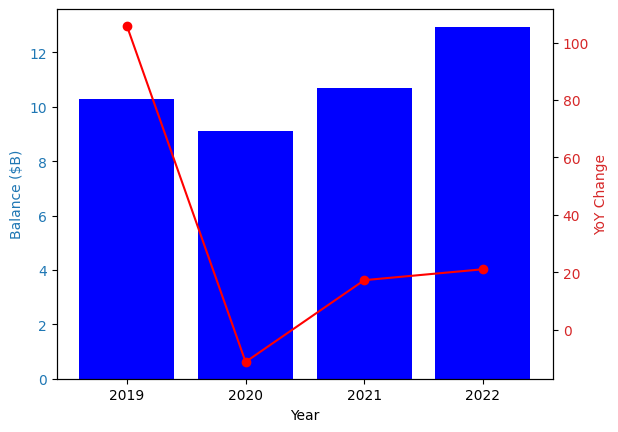

In [173]:
subset = yearly_balance_sp.loc[1:, ['year', 'balance', 'YoY change']]

fig, ax1 = plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('Balance ($B)', color='tab:blue')
ax1.bar(subset['year'], subset['balance'], color='blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis plot
ax2 = ax1.twinx()
ax2.set_ylabel('YoY Change', color='tab:red')
ax2.plot(subset['year'], subset['YoY change'], color='red', marker='o')
ax2.tick_params(axis='y', labelcolor='tab:red')

### Total Trades

In [174]:
yearly_trades = orig.loc[orig['year']!=2023,['year','totaltrade']].groupby('year').sum('totaltrade').reset_index()
yearly_trades['YoY change'] = yearly_trades['totaltrade'].pct_change()*100
yearly_trades['YoY change'] = yearly_trades['YoY change'].fillna("NA") 
yearly_trades['year'] = yearly_balance['year'].astype(str)
yearly_trades

,year,totaltrade,YoY change
0,2018,3786590,NA
1,2019,7676578,102.730636
2,2020,7449263,-2.96115
3,2021,8444283,13.357295
4,2022,9234381,9.356603


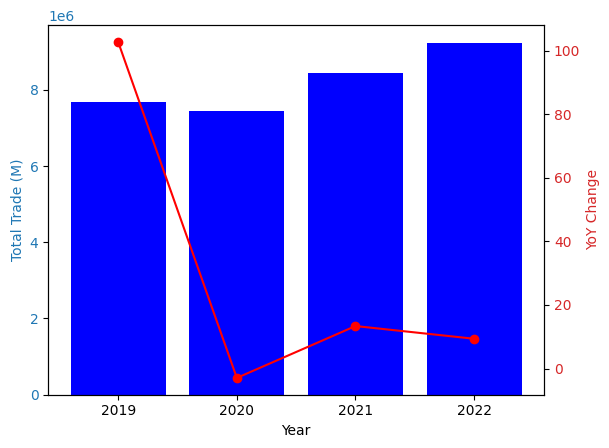

In [175]:
subset = yearly_trades.loc[1:, ['year', 'totaltrade', 'YoY change']]

fig, ax1 = plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('Total Trade (M)', color='tab:blue')
ax1.bar(subset['year'], subset['totaltrade'], color='blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis plot
ax2 = ax1.twinx()
ax2.set_ylabel('YoY Change', color='tab:red')
ax2.plot(subset['year'], subset['YoY change'], color='red', marker='o')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.show()

### Total Trade for subprime accounts

In [177]:
yearly_trades_sp = orig.loc[(orig['origvs3_band'].isin(['a. Deep subprime','b. Subprime'])) & (orig['year']!=2023),['year','totaltrade']].groupby('year').sum('totaltrade').reset_index()
yearly_trades_sp['YoY change'] = yearly_trades_sp['totaltrade'].pct_change()*100
yearly_trades_sp['YoY change'] = yearly_trades_sp['YoY change'].round(2).fillna("NA") 
yearly_trades_sp['year'] = yearly_trades_sp['year'].astype(str)
yearly_trades_sp

,year,totaltrade,YoY change
0,2018,630429,NA
1,2019,1270511,101.53
2,2020,1154856,-9.1
3,2021,1147670,-0.62
4,2022,1254741,9.33


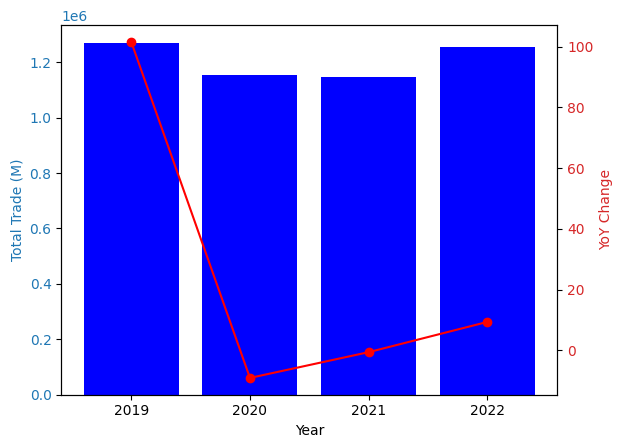

In [178]:
subset = yearly_trades_sp.loc[1:, ['year', 'totaltrade', 'YoY change']]

fig, ax1 = plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('Total Trade (M)', color='tab:blue')
ax1.bar(subset['year'], subset['totaltrade'], color='blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis plot
ax2 = ax1.twinx()
ax2.set_ylabel('YoY Change', color='tab:red')
ax2.plot(subset['year'], subset['YoY change'], color='red', marker='o')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.show()